In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import sys
import json
import pandas as pd
from pandas.io.json import json_normalize
sys.path.append("../") # Enables importing from parent directory
# from fpl_draft_league import fpl_draft_league as fpl
from fpl_draft_league import utils
from fpl_draft_league import transactions as trxns
import matplotlib.pyplot as plt
import datetime

## Refresh data

In [72]:
utils.get_json('lee.gower17@gmail.com')

Enter Password:  ·········


### Transactions Json

In [142]:
trxns_df = trxns.get_transactions_df(accepted=True)

In [143]:
trxns_df_28 = trxns_df[trxns_df['event'] == 28]

In [144]:
elements_to_pull = list(trxns_df_28['player_in_id']) + list(trxns_df_28['player_out_id'])

In [91]:
utils.get_player_data('lee.gower17@gmail.com', elements_to_pull)

Enter Password:  ·········


In [224]:
df = utils.get_player_gameweek_data(elements_to_pull, 28)
df = df[['element','total_points']]

,element,total_points
27,42,2
55,85,5
110,117,1
138,142,0
166,152,1
194,239,0
222,245,1
250,259,6
278,289,3
333,309,0


In [147]:
trxns_df_28 = (
    pd.merge(trxns_df_28, df, left_on='player_in_id', right_on='element')
    .drop(columns=['element'])
    .rename(columns={'total_points':'player_in_points'})
)

trxns_df_28 = (
    pd.merge(trxns_df_28, df, left_on='player_out_id', right_on='element')
    .drop(columns=['element'])
    .rename(columns={'total_points':'player_out_points'})
)

In [149]:
trxns_df_28 = trxns_df_28[[
    'team',
    'event',
    'kind',
    # Player details
    'player_in',
    'player_in_id',
    'player_out',
    'player_out_id',
    # Player points
    'player_in_points',
    'player_out_points',
    'result'
]]

In [151]:
trxns_df_28

,team,event,kind,player_in,player_in_id,player_out,player_out_id,player_in_points,player_out_points,result
0,John,28,w,Dunk,42,Sidibé,510,2,0,a
1,Dave,28,w,Bardsley,85,Digne,142,5,0,a
2,Benji,28,w,Barkley,117,Pulisic,432,1,0,a
3,Benji,28,w,Webster,493,Stephens,309,2,0,a
4,Liam,28,f,Ighalo,623,Deulofeu,364,0,1,a
5,John,28,f,Cantwell,289,Lucas Moura,346,3,1,a
6,ben,28,f,Fred,245,Pogba,239,1,0,a


In [152]:
trxns_df_28['net_xfer_value'] = trxns_df_28['player_in_points'] - trxns_df_28['player_out_points']

In [153]:
trxns_df_28

,team,event,kind,player_in,player_in_id,player_out,player_out_id,player_in_points,player_out_points,result,net_xfer_value
0,John,28,w,Dunk,42,Sidibé,510,2,0,a,2
1,Dave,28,w,Bardsley,85,Digne,142,5,0,a,5
2,Benji,28,w,Barkley,117,Pulisic,432,1,0,a,1
3,Benji,28,w,Webster,493,Stephens,309,2,0,a,2
4,Liam,28,f,Ighalo,623,Deulofeu,364,0,1,a,-1
5,John,28,f,Cantwell,289,Lucas Moura,346,3,1,a,2
6,ben,28,f,Fred,245,Pogba,239,1,0,a,1


In [205]:
colour_dict = {
        'Thomas': 
            {
                'color':'#04f5ff',
                'hatch':True,
                'hatch_type':'x',
            },
        'Huw':
            {
                'color':'#e90052',
                'hatch':True,
                'hatch_type':'/',
            },
        'Benji':
            {
                'color':'#00ff85',
                'hatch':True,
                'hatch_type':'o',
            },
        'John':
            {
                'color':'#38003c',
                'hatch':True,
                'hatch_type':'.',
            },
        'Dave':
            {
                'color':'#EAFF04',
                'hatch':True,
                'hatch_type':'+',
            },
        'James':
            {
                'color':'#04f5ff',
                'hatch':False,
                'hatch_type':'-',
            },
        'Rebecca':
            {
                'color':'#e90052',
                'hatch':False,
                'hatch_type':'*',
            },
        'Cory':
            {
                'color':'#00ff85',
                'hatch':False,
                'hatch_type':'\\',
            },
        'Liam':
            {
                'color':'#38003c',
                'hatch':False,
                'hatch_type':'OO',
            },
        'ben':
            {
                'color':'#EAFF04',
                'hatch':False,
                'hatch_type':'***',
            }
    }

1
1
1
1
1
1


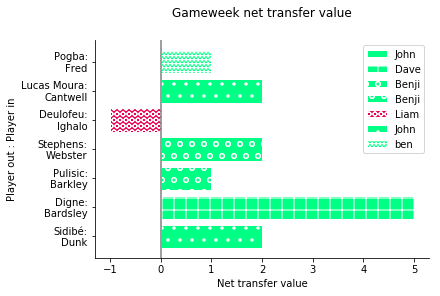

In [221]:
plt.figure()
my_bar = plt.barh(trxns_df_28.player_out + ':\n' + trxns_df_28.player_in, trxns_df_28['net_xfer_value'])

for i, team in enumerate(trxns_df_28['team']):
    # my_bar[i].set_color(colour_dict[team]['color'])[
    my_bar[i].set_label(team)
    my_bar.patches[i].set_hatch(colour_dict[team]['hatch_type'])
    my_bar.patches[i].set_edgecolor('white')
    
    if trxns_df_28.iloc[i]['net_xfer_value'] >= 0:
        
        my_bar.patches[i].set_facecolor('#00ff85')

    else:
        my_bar.patches[i].set_facecolor('#e90052')
   
plt.axvline(x=0, color='grey')
    
    
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Gameweek net transfer value", y=1.08)
ax.set_ylabel("Player out : Player in")
ax.set_xlabel("Net transfer value")

plt.legend()
    
plt.show()

In [176]:
for i, team in enumerate(trxns_df_28['team']):
    print(str(i)+ ':' + team)

0:John
1:Dave
2:Benji
3:Benji
4:Liam
5:John
6:ben


In [181]:
my_bar[0].set_color(colour_dict['John']['color'])

In [170]:
trxns_df_28

,team,event,kind,player_in,player_in_id,player_out,player_out_id,player_in_points,player_out_points,result,net_xfer_value
0,John,28,w,Dunk,42,Sidibé,510,2,0,a,2
1,Dave,28,w,Bardsley,85,Digne,142,5,0,a,5
2,Benji,28,w,Barkley,117,Pulisic,432,1,0,a,1
3,Benji,28,w,Webster,493,Stephens,309,2,0,a,2
4,Liam,28,f,Ighalo,623,Deulofeu,364,0,1,a,-1
5,John,28,f,Cantwell,289,Lucas Moura,346,3,1,a,2
6,ben,28,f,Fred,245,Pogba,239,1,0,a,1


## Get the transactions rankings

In [60]:
all_trxns = trxns.get_trxn_rankings(trxns_df, accepted=False, event=27)

In [61]:
accepted_trxns = trxns.get_trxn_rankings(trxns_df, accepted=True, event=27)

In [62]:
trxns_propn = (pd.merge(all_trxns, accepted_trxns, left_index=True, right_index=True)
               .rename(columns={
                   'count_x':'total',
                   'count_y':'accepted',
               })
              )

trxns_propn['success_rate'] = trxns_propn['accepted'] / trxns_propn['total']
trxns_propn = trxns_propn[['accepted', 'total', 'success_rate']]

In [63]:
trxns_propn

,accepted,total,success_rate
team,,,
Benji,6,9,0.666667
Cory,3,8,0.375000
John,4,5,0.800000
James,1,2,0.500000


<BarContainer object of 4 artists>

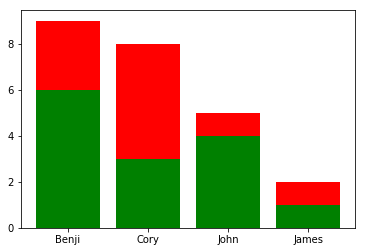

In [66]:
plt.figure()
plt.bar(trxns_propn.index, trxns_propn['total'], color='red')
plt.bar(trxns_propn.index, trxns_propn['accepted'], color='green')

In [6]:
rankings = trxns.get_trxn_rankings(df)
rankings

,count
player_first_name,
John,41
Benji,39
Cory,32
Thomas,29
James,25
ben,21
Dave,18
Rebecca,12
Liam,8


## Chart the transaction volume by gameweek

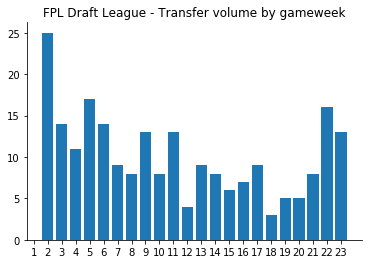

,event,player_in
0,2,25
1,3,14
2,4,11
3,5,17
4,6,14
5,7,9
6,8,8
7,9,13
8,10,8
9,11,13


In [7]:
trxns.chart_trxn_vol(df)